In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
steps = pd.read_csv("Assignment 1 - steps data (1).csv", encoding="utf-8", sep=";", parse_dates=True)

In [3]:
#set the index as id which will later be transposed
steps.set_index('id', inplace=True)
steps.head()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2626.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,10710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#now we can change the column values to datetime for plotting
pd.to_datetime(steps.columns)

DatetimeIndex(['2013-06-20', '2013-06-21', '2013-06-22', '2013-06-23',
               '2013-06-24', '2013-06-25', '2013-06-26', '2013-06-27',
               '2013-06-28', '2013-06-29',
               ...
               '2014-04-05', '2014-05-05', '2014-06-05', '2014-07-05',
               '2014-08-05', '2014-09-05', '2014-10-05', '2014-11-05',
               '2014-12-05', '2014-05-13'],
              dtype='datetime64[ns]', length=328, freq=None)

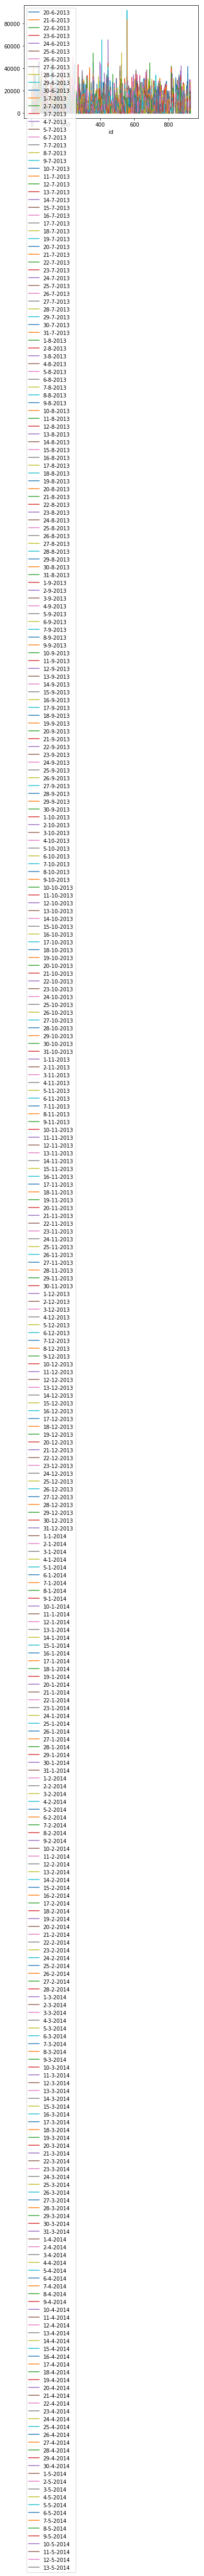

In [5]:
steps.plot()

In [6]:
#the plot was very unsatisfactory. need to work on the dataframe format a bit more
#perhaps convert steps df from longform to wide from?
steps.head()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2626.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,10710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#or maybe change the index?
steps.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            920, 921, 922, 923, 924, 925, 926, 927, 928, 929],
           dtype='int64', name='id', length=929)

In [8]:
#calculating the mean steps per day over all participants, seems to give the right output...maybe I should plot this instead?
steps.mean().head()

20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
23-6-2013     7631.215548
24-6-2013     7981.666667
dtype: float64

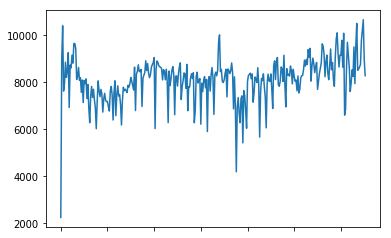

In [9]:
steps.mean().plot()
#looks better but the axis labels are missing. i should replot this properly with seaborn.

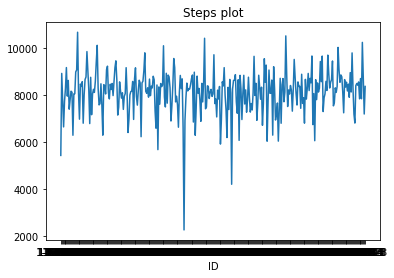

In [10]:
sns.lineplot(data=steps.mean())
plt.xlabel('ID')
plt.title('Steps plot')
plt.show()
#something went wrong here, the axis lables are off, perhaps should try adding date as a column and directly calling for plot

In [11]:
#to get the date as a column and index is very difficult
#creating new dataframe to experiment with
#s2.resample('D').mean()
s2 = steps.T.set_index(pd.to_datetime(steps.columns))
s2["date"] = s2.index
s2.head()

id,1,2,3,4,5,6,7,8,9,10,...,921,922,923,924,925,926,927,928,929,date
2013-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-20
2013-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20488.0,NaN,NaN,NaN,NaN,NaN,2013-06-21
2013-06-22,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4204.0,NaN,NaN,NaN,NaN,NaN,2013-06-22
2013-06-23,NaN,NaN,NaN,4067.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3161.0,5677.0,NaN,NaN,NaN,NaN,NaN,2013-06-23
2013-06-24,NaN,NaN,NaN,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9232.0,5574.0,NaN,NaN,1730.0,NaN,NaN,2013-06-24


In [12]:
s2["mean_steps"] = steps.mean()
s2.head()

id,1,2,3,4,5,6,7,8,9,10,...,922,923,924,925,926,927,928,929,date,mean_steps
2013-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-20,2253.454545
2013-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20488.0,NaN,NaN,NaN,NaN,NaN,2013-06-21,8968.935065
2013-06-22,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4204.0,NaN,NaN,NaN,NaN,NaN,2013-06-22,10412.117424
2013-06-23,NaN,NaN,NaN,4067.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3161.0,5677.0,NaN,NaN,NaN,NaN,NaN,2013-06-23,7631.215548
2013-06-24,NaN,NaN,NaN,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9232.0,5574.0,NaN,NaN,1730.0,NaN,NaN,2013-06-24,7981.666667


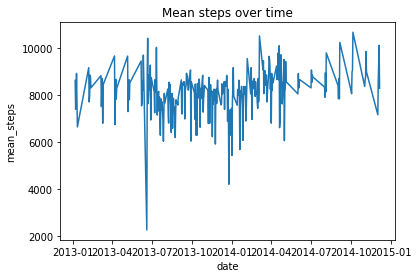

In [15]:
#got the date column, trying the plot again
#cannot plot data against id so have to somehow create id column as well
sns.lineplot(x=s2["date"], y=s2["mean_steps"], data=s2)
plt.title('Mean steps over time')
plt.xlabel('date')
plt.show()

In [ ]:
s2.info()